# Import Libraries

In [1]:
import numpy as np 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings                                                     
warnings.filterwarnings("ignore")
from scipy.stats import f_oneway

# Load the Data

In [6]:
data = pd.read_csv('Obesity_Dataset.csv')

In [8]:
data.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


In [10]:
data.dtypes

Sex                                  int64
Age                                  int64
Height                               int64
Overweight_Obese_Family              int64
Consumption_of_Fast_Food             int64
Frequency_of_Consuming_Vegetables    int64
Number_of_Main_Meals_Daily           int64
Food_Intake_Between_Meals            int64
Smoking                              int64
Liquid_Intake_Daily                  int64
Calculation_of_Calorie_Intake        int64
Physical_Excercise                   int64
Schedule_Dedicated_to_Technology     int64
Type_of_Transportation_Used          int64
Class                                int64
dtype: object

## I will change the variables to actual representations for better explanations, with given table from kaggle

In [13]:
mapping_dict = {
    'Sex': {
        1: 'Male',
        2: 'Female'
    },
    'Overweight_Obese_Family': {
        1: 'Yes',
        2: 'No'
    },
    'Consumption_of_Fast_Food': {
        1: 'Yes',
        2: 'No'
    },
    'Frequency_of_Consuming_Vegetables': {
        1: 'Rarely',
        2: 'Sometimes',
        3: 'Always'
    },
    'Number_of_Main_Meals_Daily': {
        1: '1-2',
        2: '3',
        3: '3+'
    },
    'Food_Intake_Between_Meals': {
        1: 'Rarely',
        2: 'Sometimes',
        3: 'Usually',
        4: 'Always'
    },
    'Smoking': {
        1: 'Yes',
        2: 'No'
    },
    'Liquid_Intake_Daily': {
        1: 'Less than 1L',
        2: '1-2L',
        3: 'More than 2L'
    },
    'Calculation_of_Calorie_Intake': {
        1: 'Yes',
        2: 'No'
    },
    'Physical_Excercise': {
        1: 'No activity',
        2: '1-2 days',
        3: '3-4 days',
        4: '5-6 days',
        5: '6+ days'
    },
    'Schedule_Dedicated_to_Technology': {
        1: '0-2 hours',
        2: '3-5 hours',
        3: '5+ hours'
    },
    'Type_of_Transportation_Used': {
        1: 'Automobile',
        2: 'Motorbike',
        3: 'Bike',
        4: 'Public transport',
        5: 'Walking'
    
    }
}


In [15]:
# Apply mappings
for column, mapping in mapping_dict.items():
    data[column] = data[column].map(mapping)

# Save to a new file if you want
data.to_csv("mapped_dataset.csv", index=False)

In [17]:
data = pd.read_csv("mapped_dataset.csv")
data.head()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,Female,18,155,No,No,Always,1-2,Usually,No,Less than 1L,No,3-4 days,5+ hours,Public transport,2
1,Female,18,158,No,No,Always,1-2,Rarely,No,Less than 1L,No,No activity,5+ hours,Bike,2
2,Female,18,159,No,No,Sometimes,1-2,Usually,No,More than 2L,No,1-2 days,5+ hours,Public transport,2
3,Female,18,162,No,No,Sometimes,3,Sometimes,No,1-2L,No,No activity,5+ hours,Public transport,2
4,Female,18,165,No,Yes,Sometimes,1-2,Usually,No,Less than 1L,No,3-4 days,5+ hours,Motorbike,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Sex                                1610 non-null   object
 1   Age                                1610 non-null   int64 
 2   Height                             1610 non-null   int64 
 3   Overweight_Obese_Family            1610 non-null   object
 4   Consumption_of_Fast_Food           1610 non-null   object
 5   Frequency_of_Consuming_Vegetables  1610 non-null   object
 6   Number_of_Main_Meals_Daily         1610 non-null   object
 7   Food_Intake_Between_Meals          1610 non-null   object
 8   Smoking                            1610 non-null   object
 9   Liquid_Intake_Daily                1610 non-null   object
 10  Calculation_of_Calorie_Intake      1610 non-null   object
 11  Physical_Excercise                 1610 non-null   object
 12  Schedu

In [21]:
data.isna().sum()

Sex                                  0
Age                                  0
Height                               0
Overweight_Obese_Family              0
Consumption_of_Fast_Food             0
Frequency_of_Consuming_Vegetables    0
Number_of_Main_Meals_Daily           0
Food_Intake_Between_Meals            0
Smoking                              0
Liquid_Intake_Daily                  0
Calculation_of_Calorie_Intake        0
Physical_Excercise                   0
Schedule_Dedicated_to_Technology     0
Type_of_Transportation_Used          0
Class                                0
dtype: int64

In [23]:
data.duplicated().sum()

0

### Observations:
* no missing values
* no duplicates

In [26]:
data.describe()

,Age,Height,Class
count,1610.000000,1610.000000,1610.000000
mean,33.115528,167.741615,2.678882
std,9.835076,7.979873,0.815855
min,18.000000,150.000000,1.000000
25%,25.000000,161.000000,2.000000
50%,32.000000,168.000000,3.000000
75%,41.000000,174.000000,3.000000
max,54.000000,193.000000,4.000000


### Class: 
1. Underweight (73)
2. Normal (658)
3. Overweight (592)
4. Obesity (287)

## Observations: 
1. Age
<p>Range: 18 to 54 years<p>
Mean Age: ~33.1 years<p>
Distribution: The age distribution is moderately centered:<p>
25% of participants are 25 or younger<p>
50% are 32 or younger<p>
75% are 41 or younger<p>
Observation: The dataset consists mostly of young to middle-aged adults.<p>

2. Height (in cm)<p>
Range: 150 cm to 193 cm<p>
Mean Height: ~167.7 cm<p>
Standard Deviation: ~8 cm — indicating moderate variability<p>
Distribution:<p>
25% are 161 cm or shorter<p>
50% are 168 cm or shorter<p>
75% are 174 cm or shorter<p>
Observation: Heights are fairly normally distributed, slightly skewed towards average adult height.<p>


# EDA

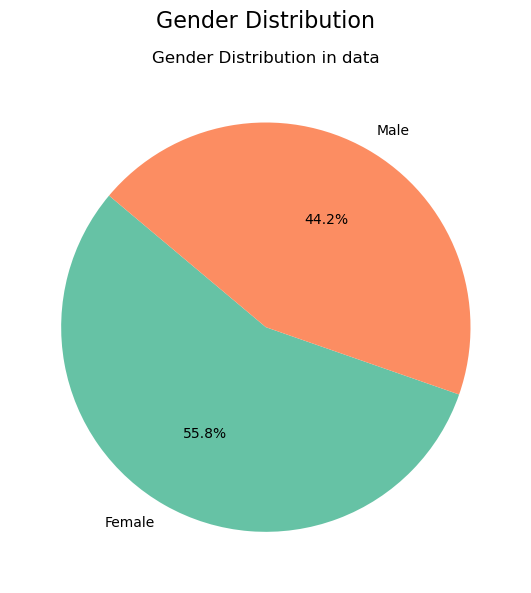

In [47]:
import matplotlib.pyplot as plt

# Create a single subplot instead of 3
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the pie chart
data['Sex'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    ax=ax,
    colors=plt.cm.Set2.colors
)

ax.set_title('Gender Distribution in data')
ax.set_ylabel('')  # Hide the default y-axis label

plt.suptitle('Gender Distribution', size=16)
plt.tight_layout()
plt.show()


## Observations:

Gender Distribution is fairly balanced in data

In [62]:
def plot_box(column_name):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(6, 6))
    data[column_name].plot.box()
    plt.title(f'Distribution of {column_name} in data')
    plt.ylabel(column_name)
    plt.tight_layout()
    plt.show()



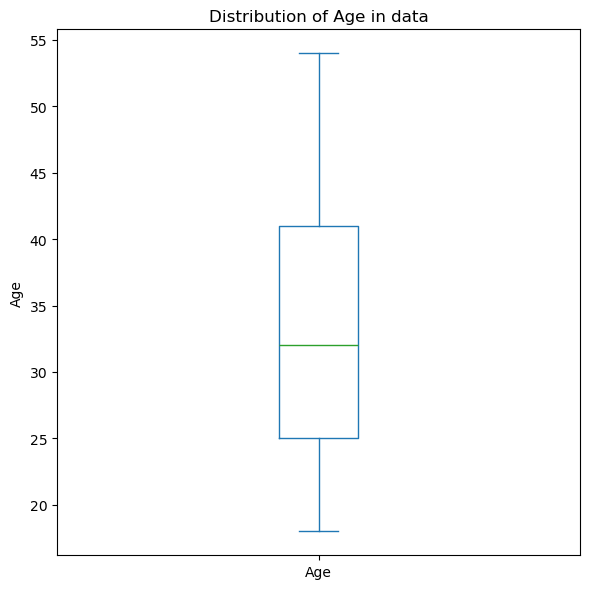

In [64]:
plot_box('Age')

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_violin(column_name):
    plt.figure(figsize=(6, 6))
    sns.violinplot(y=data[column_name])
    plt.title(f'Distribution of {column_name} in data')
    plt.ylabel(column_name)
    plt.tight_layout()
    plt.show()


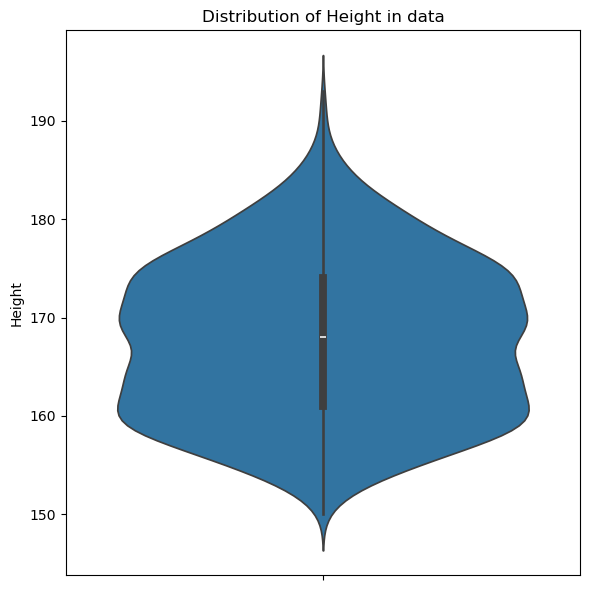

In [68]:
plot_violin('Height')

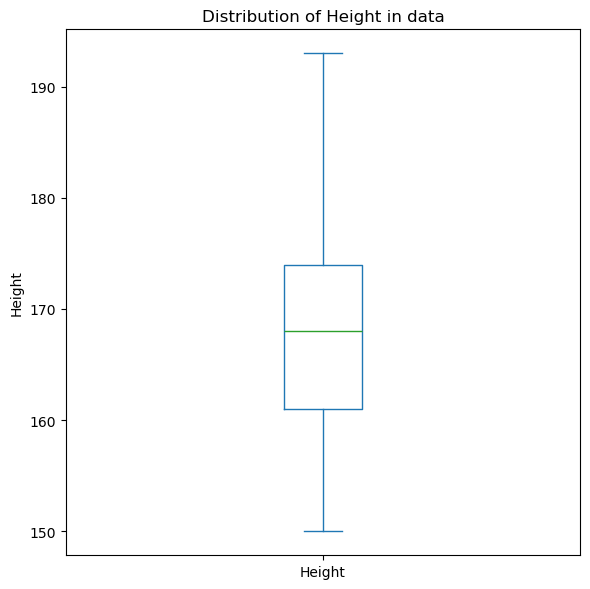

In [70]:
plot_box('Height')

In [72]:
import matplotlib.pyplot as plt

def plot_pie(column_name):
    plt.figure(figsize=(7, 7))
    data[column_name].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=120,
        explode=[0.1, 0],  # Slightly explode the first slice
        shadow=True,
        colors=plt.cm.Set2.colors
    )
    plt.title(f'Distribution of {column_name} in data')
    plt.ylabel('')  # Remove default ylabel
    plt.tight_layout()
    plt.show()


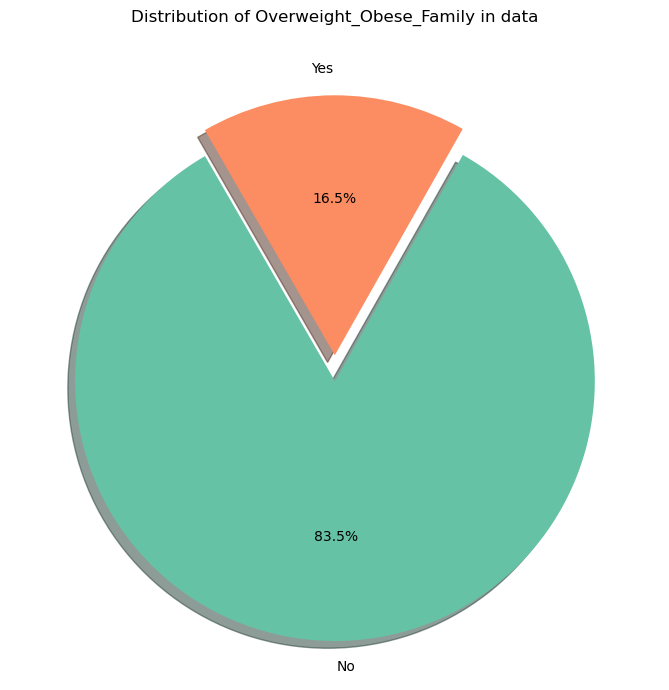

In [74]:
plot_pie('Overweight_Obese_Family')



## Observations:

* Maximum people in our Dataset don't have a Overweight_Obese_Family.
* Around 16.5% people in our dataset have are from Overweight_Obese_Family.

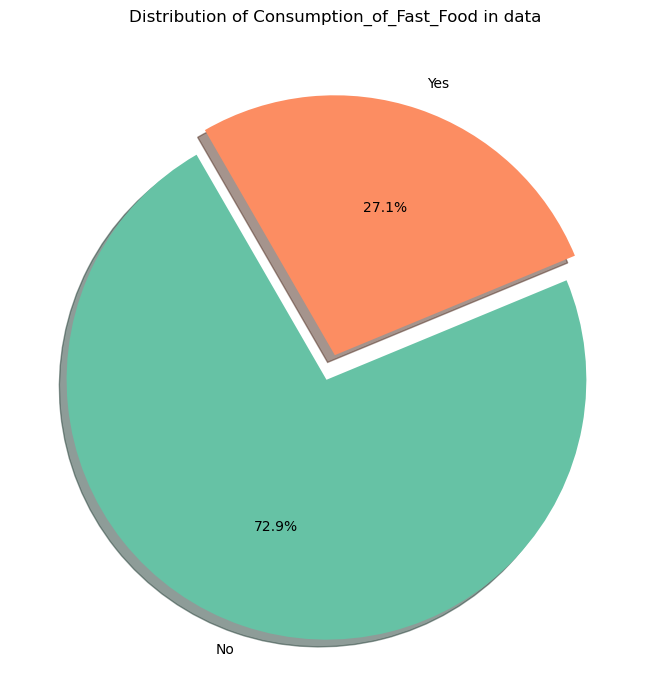

In [78]:
plot_pie('Consumption_of_Fast_Food')

## Observations

* Around 27.1 % of the the people in our dataset frequently consumes fast food.

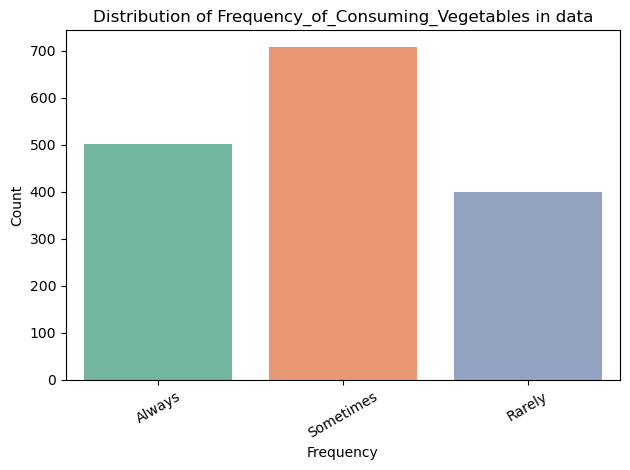

In [86]:
# Let's look the distribution of Frequency_of_Consuming_Vegetables


import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='Frequency_of_Consuming_Vegetables', palette='Set2')
plt.title('Distribution of Frequency_of_Consuming_Vegetables in data')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [88]:

data['Smoking'].value_counts()

Smoking
No     1118
Yes     492
Name: count, dtype: int64

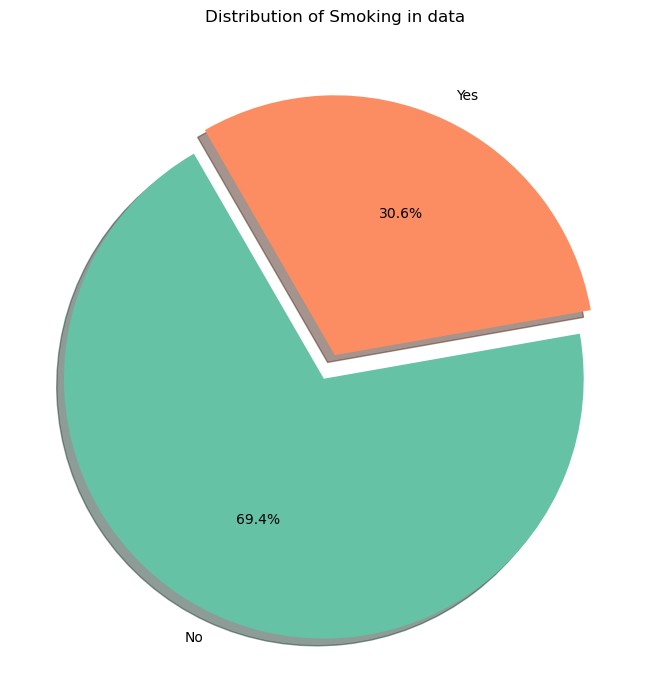

In [90]:

plot_pie('Smoking')

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar(column_name):
    plt.figure(figsize=(8, 6))
    custom_palette = sns.color_palette('Set2')

    data[column_name].value_counts().plot(
        kind='bar',
        color=custom_palette
    )

    plt.title(f'Distribution of {column_name} in data')
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


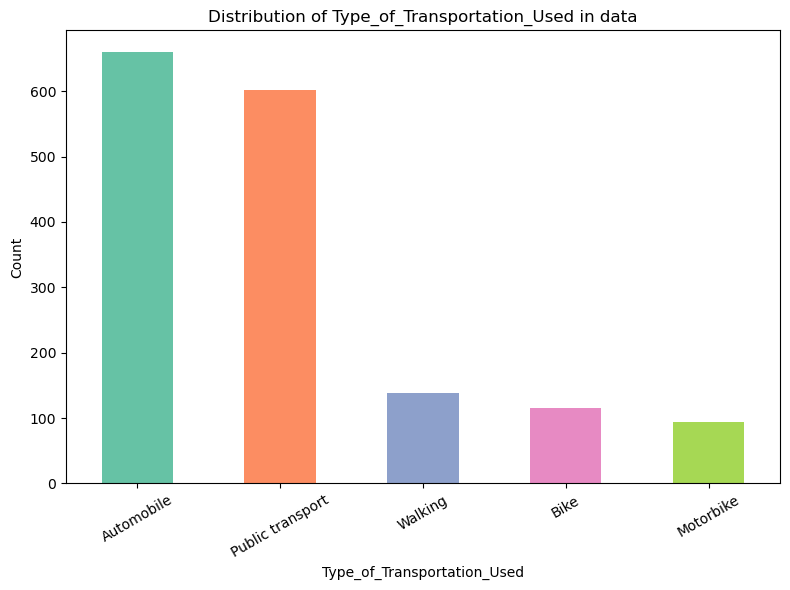

In [98]:
plot_bar('Type_of_Transportation_Used')

In [103]:
data['Class'] = data['Class'].astype('object')


## Observations

* Most of the people uses Automobile followed by Public Transporation.
* Very few people prefer Walking,Mototrbike or Bike.
* We can combine Bike with Motorbike.

In [111]:
print(data['Number_of_Main_Meals_Daily'].unique())


['1-2' '3' '3+']


In [115]:
meal_mapping = {
    '1-2': 1,
    '3': 2,
    '3+': 3
}

data['Number_of_Main_Meals_Daily'] = data['Number_of_Main_Meals_Daily'].map(meal_mapping)


In [117]:
from scipy.stats import f_oneway

# Define variables
Class = data['Class']
Meals = data['Number_of_Main_Meals_Daily']

# Prepare the groups: list of Meals values for each unique Class
grouped_meals = [Meals[Class == category] for category in Class.unique()]

# Perform ANOVA
f_statistic, p_value = f_oneway(*grouped_meals)

# Output results
print("F-Statistic:", f_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences in the number of meals across weight classes.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in the number of meals across weight classes.")


F-Statistic: 200.5107282294793
P-value: 1.9042490477135904e-110
Reject the null hypothesis: There are significant differences in the number of meals across weight classes.


# ANOVA Result
* F-Statistic: 200.51 — this is very large, meaning there's a big difference between group means.
* P-value: 1.90e-110 — this is practically 0, much smaller than the 0.05 threshold.

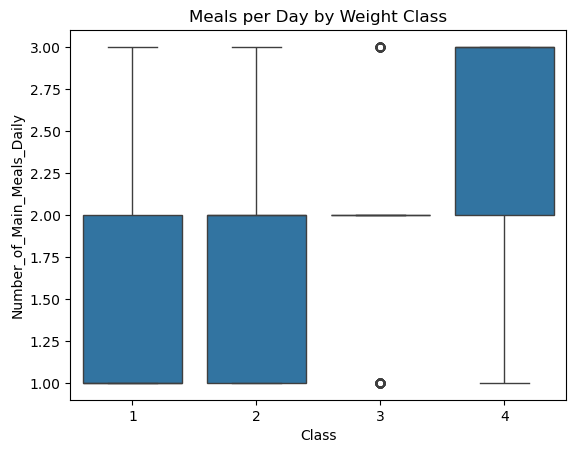

In [119]:
import seaborn as sns
sns.boxplot(x='Class', y='Number_of_Main_Meals_Daily', data=data)
plt.title('Meals per Day by Weight Class')
plt.show()


# Observations from the Boxplot:
1. Class 1 & 2 (Underweight & Normal):
* Mostly eat 1–2 meals/day.
* Slightly lower median compared to others.
* Wider spread (from 1 to 3 meals).
  
2. Class 3 (Overweight):
* Median is higher, around 2–3 meals/day.
* Very narrow spread, suggesting most people in this class eat exactly 3 meals.

3. Class 4 (Obesity):
* Highest median — likely 3+ meals/day.
* Wider distribution, with some eating just 1 meal and some 3+.

# CHI SQ TEST

In [123]:
# Let's see the p value to check their dependencies
from scipy.stats import chi2_contingency
def ch_sq_test(var1, var2):
  table = pd.crosstab(var1, var2)
  _, p, _, _ = chi2_contingency(table, correction=False)
  print (table)
  if p < 0.05:
    print('Reject the Null',p)
  else:
    print('Failed to reject the null Hypothesis',p)

# Gender and SMOKE

In [131]:
ch_sq_test(data['Sex'],data['Smoking'])

Smoking   No  Yes
Sex              
Female   696  202
Male     422  290
Reject the Null 3.0492733663494713e-15


## Result Summary:
* P-value: 3.049 × 10⁻¹⁵
* That’s extremely small, much less than 0.05.
## Interpretation
* Reject the null hypothesis.
* There is a statistically significant association between gender and smoking status. In simpler terms:

* Sex and Smoking are not independent.
* Smoking behavior differs significantly between males and females.

# Overweight_Obese_Family and SMOKE

In [135]:
ch_sq_test(data['Overweight_Obese_Family'],data['Smoking'])

Smoking                   No  Yes
Overweight_Obese_Family          
No                       992  352
Yes                      126  140
Reject the Null 1.1970432718940848e-17


## Chi-Square Test Interpretation
* P-value: 1.197 × 10⁻¹⁷
* Conclusion: Reject the null hypothesis
* There is a significant association between having overweight/obese family members and smoking behavior.
## What it Means
* Individuals from families with obesity are more likely to smoke.
* Let’s look at smoking proportions:
* Obese family = Yes:
* 140 smokers / (126 + 140) ≈ 52.6% smokers
* Obese family = No:
* 352 smokers / (992 + 352) ≈ 26.2% smokers
* So, the smoking rate is twice as high in people who have overweight/obese family members.

# Type_of_Transportation_Used and Sex

In [142]:
ch_sq_test(data['Type_of_Transportation_Used'],data['Sex'])

Sex                          Female  Male
Type_of_Transportation_Used              
Automobile                      362   298
Bike                            100    16
Motorbike                        34    60
Public transport                310   292
Walking                          92    46
Reject the Null 2.8433199148760515e-14


## Chi-Square Test Result
* P-value: 2.84 × 10⁻¹⁴
* Reject the null hypothesis
* There is a statistically significant association between gender and type of transportation used.

## What it Means:
* Gender influences transportation preferences in this dataset.
* Some key patterns:
* Females are much more likely to use bikes (100 vs. 16).
* Males are more likely to use motorbikes (60 vs. 34).
* Public transport and walking are fairly balanced.